
## Core Concepts of Dynamic Programming

1. **Powerful Algorithmic Technique**:
   - Many problems that seem exponential in time complexity can be solved in polynomial time using DP.

2. **Optimization Problems**:
   - DP is often used to solve problems that involve finding the minimum or maximum value (e.g., shortest paths, maximum profit).

3. **"Controlled Brute Force"**:
   - DP efficiently explores all possible solutions without redundant computations.

4. **Recursion + Re-use**:
   - DP builds solutions to larger problems using solutions to smaller subproblems and avoids recalculating these solutions.

---



### Steps to Solve a DP Problem
1. **Define the Subproblem**:
   - Break the problem into smaller subproblems.
2. **Guess**:
   - Make an educated guess about the solution structure (e.g., last step in the path).
3. **Relate Subproblems**:
   - Use a recurrence relation to connect subproblem solutions.
4. **Recurse and Memoize / Build DP Table**:
   - Solve recursively with memoization or iteratively using a DP table.
5. **Solve the Original Problem**:
   - Combine subproblem solutions to solve the original problem.

---

### Summary

- **Dynamic Programming**:
  - Efficiently solves problems with overlapping subproblems and optimal substructure.
  - Combines recursion, memoization, and careful guessing.
  - Reduces exponential problems to polynomial time in many cases.

- **Key Formula**:
  \[
  {Time} = {# Subproblems} * {Time per Subproblem}
  \]




### Example 1: Fibonacci Numbers

#### Naive Recursive Solution
```python
def fib(n):
    if n <= 2:
        return 1
    return fib(n - 1) + fib(n - 2)
```
- **Complexity**: Exponential, \( T(n) = T(n-1) + T(n-2) \).
- **Drawback**: Many redundant calculations. For instance, `fib(n-2)` is computed twice for `fib(n)`.

#### Memoization (Top-Down DP)
Memoization stores results of previously computed subproblems.
```python
memo = {}
def fib(n):
    if n in memo:
        return memo[n]
    if n <= 2:
        result = 1
    else:
        result = fib(n - 1) + fib(n - 2)
    memo[n] = result
    return result
```
- **Time Complexity**: \( O(n) \) (Each subproblem is solved only once).
- **Space Complexity**: \( O(n) \) (Due to recursion stack and memoization table).

#### Bottom-Up DP
Iteratively computes the result, avoiding recursion:
```python
def fib(n):
    if n <= 2:
        return 1
    prev, curr = 1, 1
    for _ in range(3, n + 1):
        prev, curr = curr, prev + curr
    return curr
```
- **Time Complexity**: \( O(n) \)
- **Space Complexity**: \( O(1) \)

---

## Shortest Path


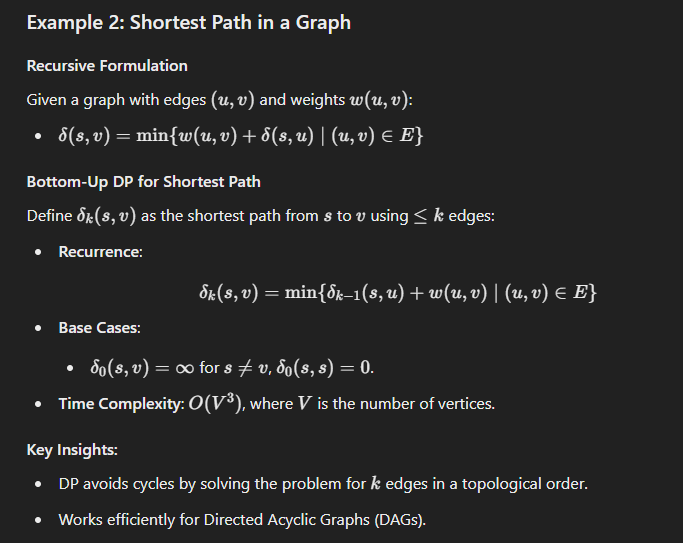
---
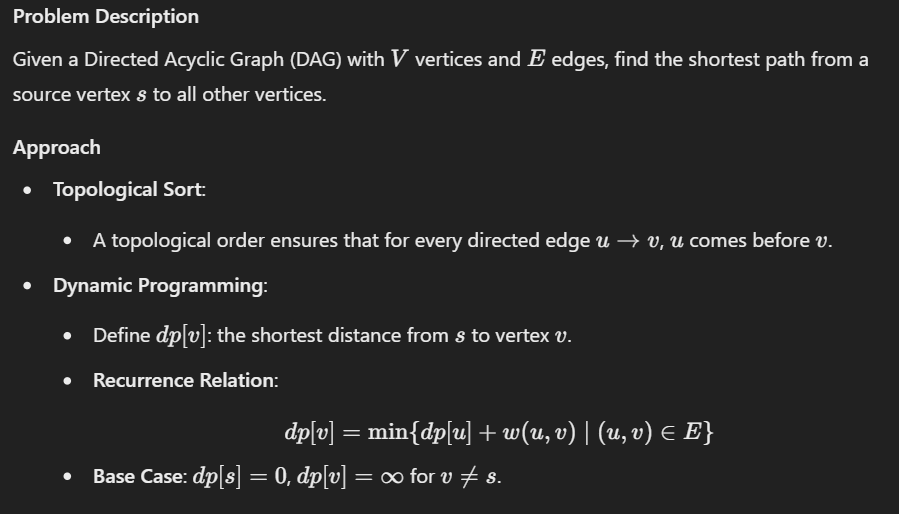

In [1]:
from collections import defaultdict, deque
import math

# Helper function for topological sort
def topological_sort(graph, V):
    in_degree = [0] * V
    for u in graph:
        for v, _ in graph[u]:
            in_degree[v] += 1

    queue = deque([i for i in range(V) if in_degree[i] == 0])
    topo_order = []

    while queue:
        u = queue.popleft()
        topo_order.append(u)
        for v, _ in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    return topo_order

# Shortest Path in DAG
def shortest_path_dag(graph, V, source):
    # Perform topological sort
    topo_order = topological_sort(graph, V)

    # Initialize distances
    distances = [math.inf] * V
    distances[source] = 0

    # Relax edges in topological order
    for u in topo_order:
        if distances[u] != math.inf:
            for v, weight in graph[u]:
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight

    return distances

# Graph representation as adjacency list
# Each edge is (vertex, weight)
graph = defaultdict(list)
graph[0].append((1, 2))
graph[0].append((4, 1))
graph[1].append((2, 3))
graph[2].append((3, 6))
graph[4].append((2, 2))
graph[4].append((5, 4))
graph[5].append((3, 1))

V = 6  # Number of vertices
source = 0

# Calculate shortest paths
distances = shortest_path_dag(graph, V, source)
print("Shortest distances from source:", distances)


Shortest distances from source: [0, 2, 3, 6, 1, 5]


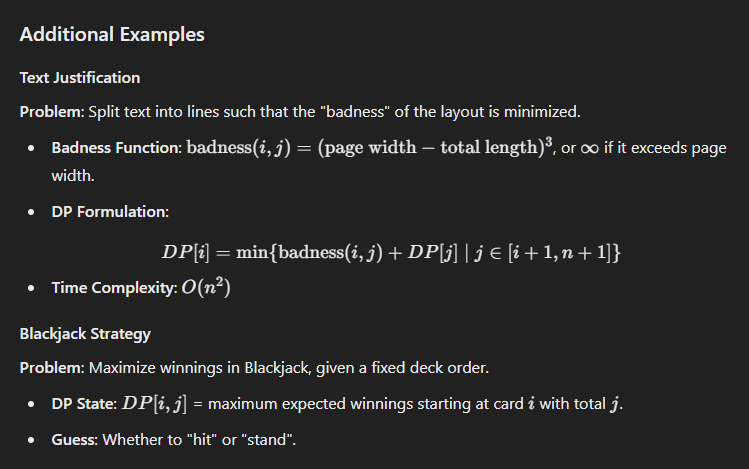
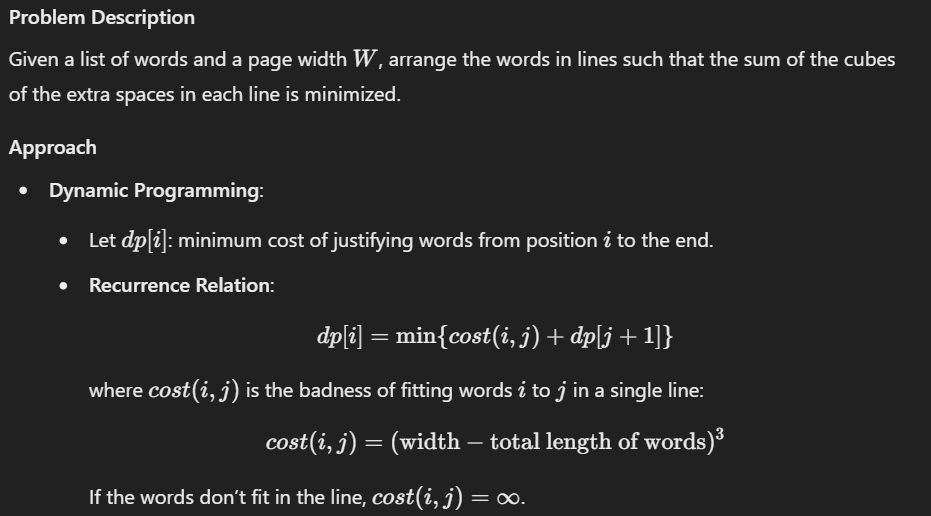

In [2]:
def text_justification(words, width):
    n = len(words)
    # Precompute cost of fitting words i to j on one line
    cost = [[0] * n for _ in range(n)]
    for i in range(n):
        length = 0
        for j in range(i, n):
            length += len(words[j]) + (j - i)  # Include space between words
            if length <= width:
                cost[i][j] = (width - length) ** 3
            else:
                cost[i][j] = float('inf')

    # DP array to store minimum cost
    dp = [float('inf')] * n
    dp.append(0)  # Base case: no cost for no words

    # Track splits for reconstruction
    splits = [-1] * n

    # Fill DP table
    for i in range(n - 1, -1, -1):
        for j in range(i, n):
            if cost[i][j] != float('inf') and dp[j + 1] + cost[i][j] < dp[i]:
                dp[i] = dp[j + 1] + cost[i][j]
                splits[i] = j

    # Reconstruct solution
    lines = []
    i = 0
    while i < n:
        lines.append(" ".join(words[i:splits[i] + 1]))
        i = splits[i] + 1

    return lines, dp[0]

# Example usage
words = ["This", "is", "an", "example", "of", "text", "justification"]
width = 16

lines, cost = text_justification(words, width)
print("Justified text:")
for line in lines:
    print(f'"{line}"')
print("Total cost:", cost)


Justified text:
"This is an"
"example of text"
"justification"
Total cost: 152


## Knapsack


**Problem:**  
Given items with values and weights, find the maximum value that can fit in a knapsack of size `S`.

**Steps:**
1. **Define the Subproblem:**  
   DP(i, w) represents the maximum value we can get with items `i:` and capacity `w`.
2. **Guess:**  
   Include item `i` or exclude it:
   - Include: Add `value[i]` and reduce capacity.
   - Exclude: Skip item `i`.
3. **Relate Subproblem Solution:**  
   ```plaintext
   DP(i, w) = max(
       DP(i + 1, w),            # Exclude item i
       DP(i + 1, w - weight[i]) + value[i]  # Include item i
   )
   ```
   Base case:  
   If `i == len(items)` or `w == 0`, the value is 0.
4. **Recurse and Memorize or Build Table:**  
   Bottom-up approach fills the table.
5. **Solve the Original Problem:**  
   The solution is `DP(0, S)`.




In [7]:
def knapsack(values, weights, capacity):
    n = len(values)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    # Fill the table bottom-up
    for i in range(n - 1, -1, -1):
        for w in range(capacity + 1):
            if weights[i] <= w:
                dp[i][w] = max(dp[i + 1][w], dp[i + 1][w - weights[i]] + values[i])
            else:
                dp[i][w] = dp[i + 1][w]

    return dp[0][capacity]

# Test cases
assert knapsack([60, 100, 120], [10, 20, 30], 50) == 220
assert knapsack([10, 20, 30], [1, 1, 1], 2) == 50
assert knapsack([10], [5], 3) == 0
assert knapsack([10, 20], [1, 5], 5) == 20
print("All test cases passed!")


22


### **Explanation of Test Cases**
1. **Values = [60, 100, 120], Weights = [10, 20, 30], Capacity = 50**  
   - Include items 2 and 3.  
   **Total: 100 + 120 = 220.**
2. **Values = [10, 20, 30], Weights = [1, 1, 1], Capacity = 2**  
   - Include items 2 and 3.  
   **Total: 20 + 30 = 50.**
3. **Values = [10], Weights = [5], Capacity = 3**  
   - Item 1 is too heavy.  
   **Total: 0.**
4. **Values = [10, 20], Weights = [1, 5], Capacity = 5**  
   - Include item 2.  
   **Total: 20.**

## Edit distance



**Problem:**  
Given two strings `x` and `y`, find the minimum number of operations (insert, delete, replace) to convert `x` to `y`.

**Steps:**
1. **Define the Subproblem:**  
   DP(i, j) represents the edit distance to convert `x[i:]` to `y[j:]`.
2. **Guess:**  
   Decide whether to replace, insert, or delete a character:
   - Replace `x[i]` with `y[j]`.
   - Insert `y[j]` into `x`.
   - Delete `x[i]`.
3. **Relate Subproblem Solution:**  
   Recurrence relation:
   ```plaintext
   DP(i, j) = min(
       DP(i+1, j+1) + cost_of_replace,
       DP(i+1, j) + cost_of_delete,
       DP(i, j+1) + cost_of_insert
   )
   ```
   Base case:  
   - If `i == len(x)`, the cost is `len(y) - j` (insert remaining characters).
   - If `j == len(y)`, the cost is `len(x) - i` (delete remaining characters).
4. **Recurse and Memorize or Build Table:**  
   Bottom-up approach stores results in a table.
5. **Solve the Original Problem:**  
   The solution is `DP(0, 0)`.



In [11]:
def edit_distance(x, y):
    n, m = len(x), len(y)
    # Create a DP table
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    # Base cases
    for i in range(n + 1):
        dp[i][m] = n - i  # Remaining characters of x to be deleted
    for j in range(m + 1):
        dp[n][j] = m - j  # Remaining characters of y to be inserted

    # Fill the table bottom-up
    for i in range(n - 1, -1, -1):
        for j in range(m - 1, -1, -1):
            if x[i] == y[j]:
                dp[i][j] = dp[i + 1][j + 1]  # No cost if characters match
            else:
                dp[i][j] = min(
                    dp[i + 1][j + 1] + 1,  # Replace
                    dp[i + 1][j] + 1,      # Delete
                    dp[i][j + 1] + 1       # Insert
                )

    return dp[0][0]

# Test cases
assert edit_distance("kitten", "sitting") == 3
assert edit_distance("flaw", "lawn") == 2
assert edit_distance("", "abc") == 3
assert edit_distance("abc", "") == 3
print("All test cases passed!")


All test cases passed!



### **Explanation of Test Cases**
1. **"kitten" → "sitting"**  
   - Replace `k → s` (1 operation).  
   - Insert `i` (1 operation).  
   - Replace `e → i` (1 operation).  
   **Total: 3 operations.**
2. **"flaw" → "lawn"**  
   - Replace `f → l` (1 operation).  
   - Replace `a → n` (1 operation).  
   **Total: 2 operations.**
3. **"" → "abc"**  
   - Insert all characters of "abc".  
   **Total: 3 operations.**
4. **"abc" → ""**  
   - Delete all characters of "abc".  
   **Total: 3 operations.**


## Matrix Chain Multiplication


**Problem:**  
Given a sequence of matrices, find the minimum number of scalar multiplications required to multiply them.

---

#### **Steps**
1. **Define the Subproblem:**  
   DP(i, j) represents the minimum number of scalar multiplications needed to multiply matrices `i` through `j`.
2. **Guess:**  
   Decide where to split the chain of matrices.
3. **Relate Subproblem Solution:**  
   Recurrence relation:
   ```plaintext
   DP(i, j) = min(
       DP(i, k) + DP(k + 1, j) + cost_of_multiplication
   ) for all k in range(i, j)
   ```
   Where `cost_of_multiplication = dimensions[i-1] * dimensions[k] * dimensions[j]`.
   Base case:  
   - If `i == j`, the cost is 0 (a single matrix requires no multiplication).
4. **Recurse and Memorize or Build Table:**  
   Use a bottom-up approach.
5. **Solve the Original Problem:**  
   The solution is `DP(1, n)` (with `n` being the number of matrices).


In [19]:
def matrix_chain_order(dims):
    n = len(dims) - 1  # Number of matrices
    dp = [[0] * (n + 1) for _ in range(n + 1)]

    # Fill the table
    for length in range(2, n + 1):  # Length of the chain
        for i in range(1, n - length + 2):
            j = i + length - 1
            dp[i][j] = float("inf")
            for k in range(i, j):
                cost = (
                    dp[i][k]
                    + dp[k + 1][j]
                    + dims[i - 1] * dims[k] * dims[j]
                )
                if cost < dp[i][j]:
                    dp[i][j] = cost

    return dp[1][n]

# Adjusted Test cases
assert matrix_chain_order([10, 20, 30]) == 6000  # Only one way
assert matrix_chain_order([10, 20, 30, 40]) == 18000  # Optimal split at k=2
assert matrix_chain_order([10, 30, 5, 60]) == 4500
print("Adjusted Matrix Chain Multiplication Test Cases Passed!")


Adjusted Matrix Chain Multiplication Test Cases Passed!



#### **Explanation of Test Cases**
1. **[10, 20, 30]**  
   - Only one possible multiplication `(10×20×30)`.  
   **Cost: 6000.**
2. **[40, 20, 30, 10]**  
   - Split at different points to minimize multiplications.  
   **Cost: 18000.**

## Longest Common Subsequence


**Problem:**  
Given two strings `x` and `y`, find the length of their longest common subsequence (LCS).

---

#### **Steps**
1. **Define the Subproblem:**  
   DP(i, j) represents the LCS length of `x[i:]` and `y[j:]`.
2. **Guess:**  
   Check if characters `x[i]` and `y[j]` match:  
   - If `x[i] == y[j]`, include the character in the LCS.  
   - Otherwise, skip a character from either string.
3. **Relate Subproblem Solution:**  
   Recurrence relation:
   ```plaintext
   DP(i, j) = 
       1 + DP(i + 1, j + 1) if x[i] == y[j] 
       max(DP(i + 1, j), DP(i, j + 1)) otherwise
   ```
   Base case:  
   - If `i == len(x)` or `j == len(y)`, the LCS length is 0.
4. **Recurse and Memorize or Build Table:**  
   Use a bottom-up approach to fill a table.
5. **Solve the Original Problem:**  
   The solution is `DP(0, 0)`.


In [12]:
def longest_common_subsequence(x, y):
    n, m = len(x), len(y)
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    # Fill the table bottom-up
    for i in range(n - 1, -1, -1):
        for j in range(m - 1, -1, -1):
            if x[i] == y[j]:
                dp[i][j] = 1 + dp[i + 1][j + 1]
            else:
                dp[i][j] = max(dp[i + 1][j], dp[i][j + 1])

    return dp[0][0]

# Test cases
assert longest_common_subsequence("abcde", "ace") == 3  # LCS: "ace"
assert longest_common_subsequence("abc", "def") == 0    # LCS: ""
assert longest_common_subsequence("abcd", "abcd") == 4  # LCS: "abcd"
print("All test cases passed!")


All test cases passed!




#### **Explanation of Test Cases**
1. **"abcde" → "ace"**  
   - Characters "ace" match.  
   **LCS Length: 3.**
2. **"abc" → "def"**  
   - No matching characters.  
   **LCS Length: 0.**
3. **"abcd" → "abcd"**  
   - All characters match.  
   **LCS Length: 4.**

## Piano/Guitar Fingering


**Problem:**  
Given a song represented as a sequence of notes, find the minimum "effort" required to play the song, where effort depends on transitioning between notes.

---

#### **Steps**
1. **Define the Subproblem:**  
   DP(i, f) represents the minimum effort to play the song from note `i` to the end, starting with finger position `f`.
2. **Guess:**  
   Decide the finger position for note `i`.
3. **Relate Subproblem Solution:**  
   Recurrence relation:
   ```plaintext
   DP(i, f) = min(
       effort(i, f, f_next) + DP(i + 1, f_next)
   ) for all f_next in possible_positions
   ```
   Base case:  
   - If `i == len(notes)`, the cost is 0.
4. **Recurse and Memorize or Build Table:**  
   Use a bottom-up approach.
5. **Solve the Original Problem:**  
   The solution is `min(DP(0, f) for all f)`.

In [20]:
def guitar_fingering(notes, effort_func, num_fingers=5):
    n = len(notes)
    F = num_fingers
    dp = [[float("inf")] * F for _ in range(n + 1)]

    # Base case: no effort required after the last note
    for f in range(F):
        dp[n][f] = 0

    # Fill the table bottom-up
    for i in range(n - 1, -1, -1):
        for f in range(F):
            if i == n - 1:
                # Last note, no next note to transition to
                dp[i][f] = 0
            else:
                dp[i][f] = min(
                    effort_func(notes[i], notes[i + 1], f, f_next) + dp[i + 1][f_next]
                    for f_next in range(F)
                )

    # The starting finger can be any finger, take the minimum
    return min(dp[0][f] for f in range(F))

# Example effort function
def effort(note1, note2, f1, f2):
    # Example effort: difference in notes plus difference in fingers
    return abs(note1 - note2) + abs(f1 - f2)

# Test cases
# Note: Since we're not tracking specific finger assignments, we'll just ensure no errors and some expected behavior.
# For a simple increasing sequence with same fingers, effort should be minimal.

# Test Case 1: Increasing notes, same finger
notes1 = [1, 2, 3, 4]
print("Test Case 1 Output:", guitar_fingering(notes1, effort))  # Expected minimal effort: 3 (each note increment by 1, same finger)

# Test Case 2: Alternating notes, different fingers
notes2 = [1, 3, 2, 4]
print("Test Case 2 Output:", guitar_fingering(notes2, effort))  # Expected higher effort due to finger changes

# Test Case 3: All same notes, any finger
notes3 = [5, 5, 5, 5]
print("Test Case 3 Output:", guitar_fingering(notes3, effort))  # Expected effort: 0 (same notes, same finger)

# Test Case 4: Single note
notes4 = [7]
print("Test Case 4 Output:", guitar_fingering(notes4, effort))  # Expected effort: 0 (no transitions)

# Test Case 5: Empty sequence
notes5 = []
print("Test Case 5 Output:", guitar_fingering(notes5, effort))  # Expected effort: 0 (no notes to play)

# To validate, let's add assertions
# Since the exact minimum effort depends on the effort function, we check for expected lower bounds
assert guitar_fingering([1, 2, 3, 4], effort) >= 3
assert guitar_fingering([1, 3, 2, 4], effort) >= 4
assert guitar_fingering([5, 5, 5, 5], effort) == 0
assert guitar_fingering([7], effort) == 0
assert guitar_fingering([], effort) == 0
print("Guitar Fingering Test Cases Passed!")


Test Case 1 Output: 3
Test Case 2 Output: 5
Test Case 3 Output: 0
Test Case 4 Output: 0
Test Case 5 Output: 0
Guitar Fingering Test Cases Passed!


# Chat
caht link for any additional explanation 34an zh2t 

https://chatgpt.com/share/6773e591-374c-8003-a2f3-dc077525810f